# Media Company Case Study

## Multiple Linear Regression

### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Step 1 :

In [7]:
media = pd.read_csv("mediacompany.csv")
del media['Unnamed: 7']
media.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017      183738   1260228         1706478     1060860448   
1  3/2/2017      193763   1270561         1690727     1031846645   
2  3/3/2017      210479   1248183         1726157     1010867575   
3  3/4/2017      240061   1492913         1855353     1079194579   
4  3/5/2017      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  
0                    0            0  
1                    0            0  
2                    0            0  
3                    1            0  
4                    0            0

In [8]:
# y/Target : Views_show

In [9]:
media.tail()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
75  5/15/2017      313945   1808684         2226788     1398052759   
76  5/16/2017      185689   1814227         2199844     1311961223   
77  5/17/2017      142260   1755803         2225752     1248266254   
78  5/18/2017      135871   1749654         2302789     1284859759   
79  5/19/2017      108961   1746735         2279036     1246026846   

    Cricket_match_india  Character_A  
75                    1            0  
76                    1            0  
77                    1            0  
78                    1            0  
79                    1            0

In [10]:
# Step 2 :

In [11]:
media.shape

(80, 7)

In [12]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

In [13]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [14]:
media.describe()

Views_show      Visitors  Views_platform  Ad_impression  \
count      80.000000  8.000000e+01    8.000000e+01   8.000000e+01   
mean   289902.625000  1.699066e+06    2.222401e+06   1.442374e+09   
std    154924.323585  2.311571e+05    2.913510e+05   2.983186e+08   
min    102520.000000  1.248183e+06    1.690727e+06   1.010868e+09   
25%    185353.250000  1.550766e+06    2.010816e+06   1.207911e+09   
50%    235807.000000  1.698843e+06    2.226270e+06   1.385931e+09   
75%    350079.000000  1.817895e+06    2.388837e+06   1.632416e+09   
max    758631.000000  2.344650e+06    3.064422e+06   2.424203e+09   

       Cricket_match_india  Character_A  
count            80.000000    80.000000  
mean              0.100000     0.375000  
std               0.301893     0.487177  
min               0.000000     0.000000  
25%               0.000000     0.000000  
50%               0.000000     0.000000  
75%               0.000000     1.000000  
max               1.000000     1.000000

In [15]:
media.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [16]:
# Datatype of date is incorrect!!

In [17]:
# Step 3 : Data Cleaning!

In [18]:
# i) Missing Values : 
media.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f16cc0f810>,
 'caps': [<matplotlib.lines.Line2D at 0x1f16cc1d090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f16cc0ec90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f16cc1e810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f16cc1f350>],
 'means': []}

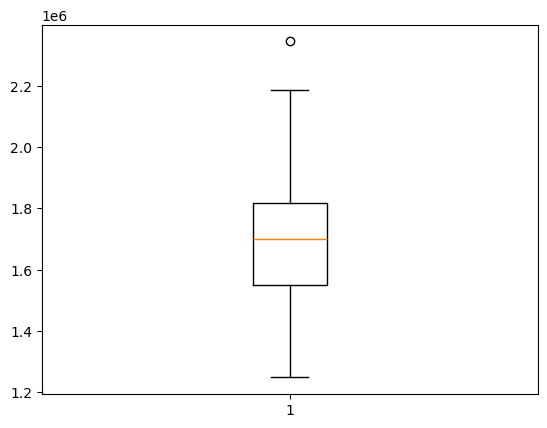

In [19]:
# ii) Outliers : 
plt.boxplot(media['Visitors'])

In [20]:
# Data Prep : 
media.dtypes
# Datatype of date is incorrect!!

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [21]:
media['Date'] = pd.to_datetime(media['Date'])

In [22]:
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
dtype: object

In [23]:
# 2 tasks : 
# 1) Create a new column to fetch day_of_week from the data
media['day_of_week'] = media['Date'].dt.dayofweek
media

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  2017-03-01      183738   1260228         1706478     1060860448   
1  2017-03-02      193763   1270561         1690727     1031846645   
2  2017-03-03      210479   1248183         1726157     1010867575   
3  2017-03-04      240061   1492913         1855353     1079194579   
4  2017-03-05      446314   1594712         2041418     1357736987   
..        ...         ...       ...             ...            ...   
75 2017-05-15      313945   1808684         2226788     1398052759   
76 2017-05-16      185689   1814227         2199844     1311961223   
77 2017-05-17      142260   1755803         2225752     1248266254   
78 2017-05-18      135871   1749654         2302789     1284859759   
79 2017-05-19      108961   1746735         2279036     1246026846   

    Cricket_match_india  Character_A  day_of_week  
0                     0            0            2  
1                     0            0            3  
2                     0            0            4  
3                     1            0            5  
4                     0            0            6  
..                  ...          ...          ...  
75                    1            0            0  
76                    1            0            1  
77                    1            0            2  
78                    1            0            3  
79                    1            0            4  

[80 rows x 8 columns]

In [24]:
# 2) Create a new column which tells if the day was on weekday/weekend
media['week_part'] = media['Date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

In [25]:
media

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  2017-03-01      183738   1260228         1706478     1060860448   
1  2017-03-02      193763   1270561         1690727     1031846645   
2  2017-03-03      210479   1248183         1726157     1010867575   
3  2017-03-04      240061   1492913         1855353     1079194579   
4  2017-03-05      446314   1594712         2041418     1357736987   
..        ...         ...       ...             ...            ...   
75 2017-05-15      313945   1808684         2226788     1398052759   
76 2017-05-16      185689   1814227         2199844     1311961223   
77 2017-05-17      142260   1755803         2225752     1248266254   
78 2017-05-18      135871   1749654         2302789     1284859759   
79 2017-05-19      108961   1746735         2279036     1246026846   

    Cricket_match_india  Character_A  day_of_week  week_part  
0                     0            0            2          0  
1                     0            0            3          0  
2                     0            0            4          0  
3                     1            0            5          1  
4                     0            0            6          1  
..                  ...          ...          ...        ...  
75                    1            0            0          0  
76                    1            0            1          0  
77                    1            0            2          0  
78                    1            0            3          0  
79                    1            0            4          0  

[80 rows x 9 columns]

In [26]:
# Exploratory Data Analysis

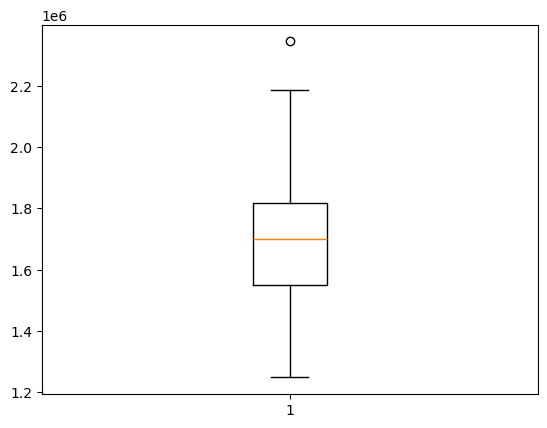

In [27]:
# 1) Uni
plt.boxplot(media['Visitors'])
plt.show()

<Axes: xlabel='Date'>

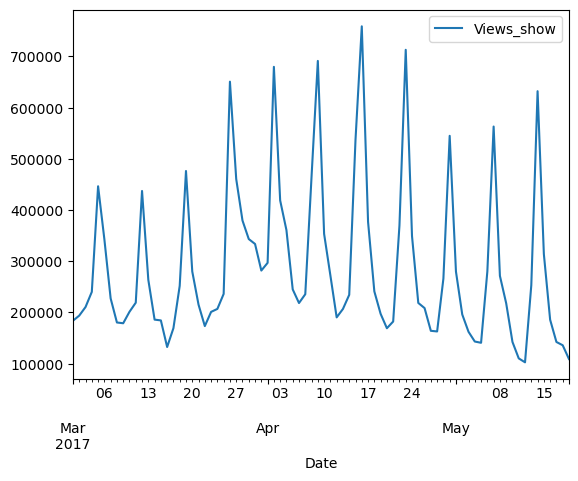

In [28]:
# 2) Bi
media.plot.line(x='Date',y='Views_show')
# therre's some pattern in the data!

<Axes: xlabel='day_of_week', ylabel='Views_show'>

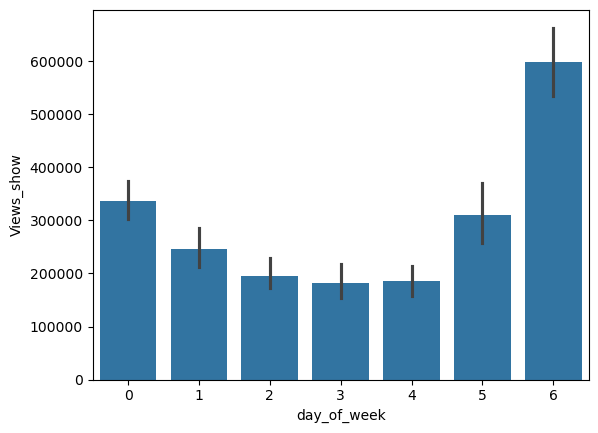

In [29]:
# Day of week
sns.barplot(data=media,x='day_of_week',y='Views_show')
# we can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days.

In [30]:
# Tasks :
# 1) Views_show and weekend/weekday
# 2) Scatter between Views_show & Visitors
# 3) Scatter between Views_show & Ad_impression
# 4) Scatter between Views_show & Views_platform
# 5) Views_show v/s CricketMatchIndia
# 6) Views_show v/s Char_A
# 7) Find corr on all numerical columns

In [31]:
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
day_of_week                     int32
week_part                       int64
dtype: object

<Axes: xlabel='week_part', ylabel='Views_show'>

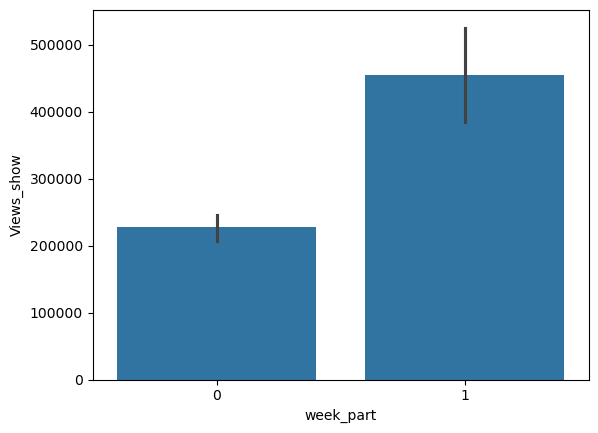

In [32]:
sns.barplot(data=media,x='week_part',y='Views_show')

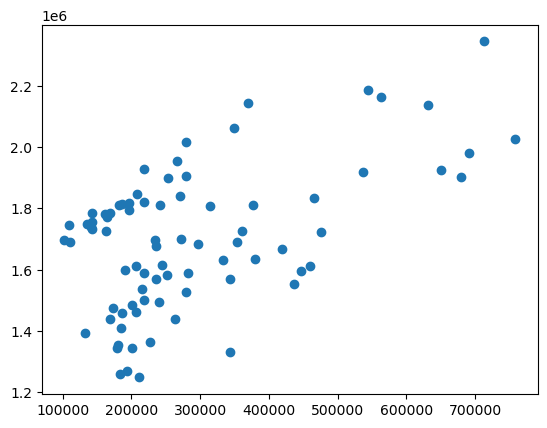

In [35]:
plt.scatter(data=media,x='Views_show',y='Visitors')


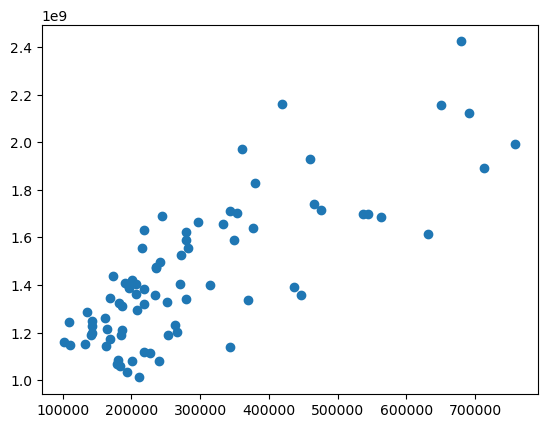

In [36]:
# 3) Scatter between Views_show & Ad_impression
plt.scatter(data=media,x='Views_show',y='Ad_impression')

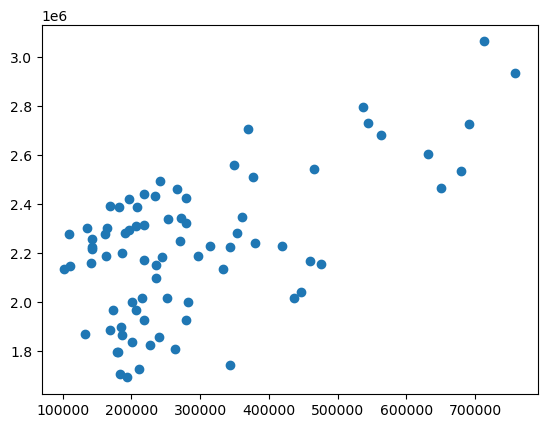

In [37]:

# 4) Scatter between Views_show & Views_platform
plt.scatter(data=media,x='Views_show',y='Views_platform')


In [45]:
media.columns


Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'day_of_week', 'week_part'],
      dtype='object')

<Axes: xlabel='Cricket_match_india', ylabel='Views_show'>

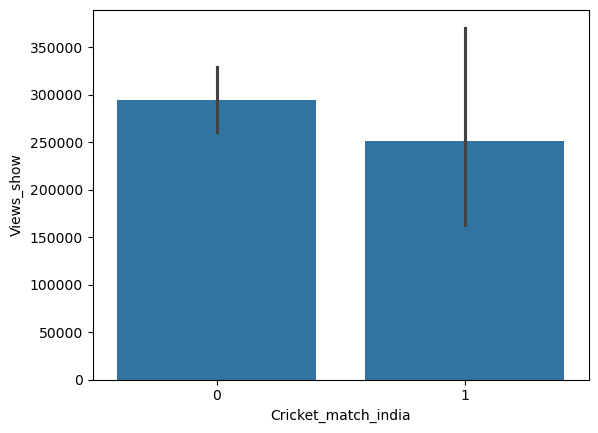

In [46]:
# 5) Views_show v/s CricketMatchIndia

sns.barplot(data=media,x='Cricket_match_india',y='Views_show')



<Axes: xlabel='Character_A', ylabel='Views_show'>

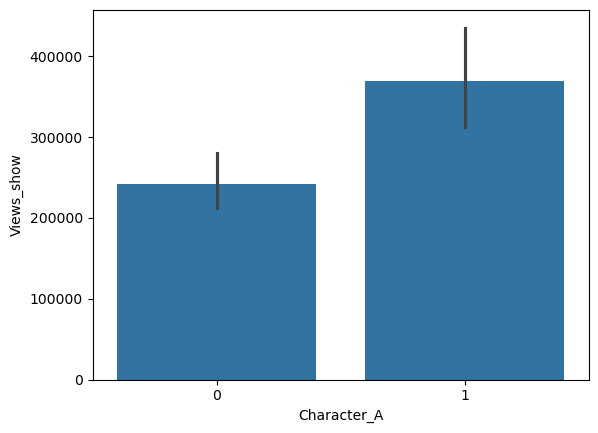

In [44]:
# 6) Views_show v/s Char_A
sns.barplot(media, x='Character_A', y='Views_show')  
# 7) Find corr on all numerical columns

In [47]:
correlation_matrix = media.corr(numeric_only=True)

In [48]:
correlation_matrix

Views_show  Visitors  Views_platform  Ad_impression  \
Views_show             1.000000  0.535290        0.604279       0.785673   
Visitors               0.535290  1.000000        0.935832       0.478598   
Views_platform         0.604279  0.935832        1.000000       0.587003   
Ad_impression          0.785673  0.478598        0.587003       1.000000   
Cricket_match_india   -0.083154  0.147210        0.036575      -0.163936   
Character_A            0.402533  0.223093        0.452375       0.644354   
day_of_week            0.410886  0.290986        0.291383       0.110749   
week_part              0.659947  0.470870        0.426731       0.329728   

                     Cricket_match_india  Character_A  day_of_week  week_part  
Views_show                     -0.083154     0.402533     0.410886   0.659947  
Visitors                        0.147210     0.223093     0.290986   0.470870  
Views_platform                  0.036575     0.452375     0.291383   0.426731  
Ad_impression                  -0.163936     0.644354     0.110749   0.329728  
Cricket_match_india             1.000000    -0.258199     0.042333   0.074652  
Character_A                    -0.258199     1.000000     0.065583   0.101195  
day_of_week                     0.042333     0.065583     1.000000   0.782171  
week_part                       0.074652     0.101195     0.782171   1.000000

<Axes: >

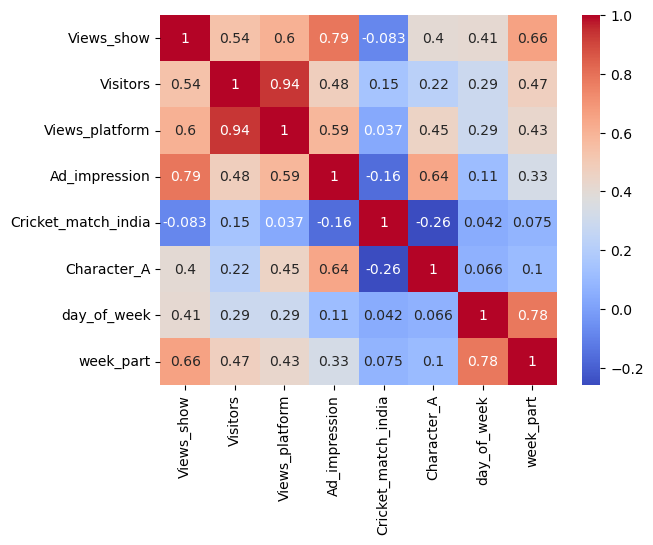

In [49]:
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
num_vars=["Views_show","Vistors","Views_platfor","Ad_impression"]
media[num_vars]